# 1 - Data Cleaning and Preprocessing:


In [2]:
# import libraries that are needed
import pandas as pd
from pathlib import Path

In [3]:
#  Read in Kaggle data from csv file
#vg_path = Path('..//Uncleaned Data//Video game sales kaggle//video_games_sales.csv')
vg_path = Path('../Cleaned Data/video_games_sales.csv')

video_game_sales_df = pd.read_csv(vg_path)



In [4]:
# Read in Combined Video game data from csv file
vg_combined_path = Path('../Cleaned Data/ratings_and_sales.csv')

combined_ratings_sales_df = pd.read_csv(vg_combined_path)
combined_ratings_sales_df.head()

,Unnamed: 0,name,id,category,first_release_date,genres,release_dates,rating,rating_count,total_rating,...,rank,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,0,007 Racing,1642,0,2000-11-20,['Racing'],"[[Timestamp('2000-11-20 00:00:00'), Timestamp(...",62.753695,21.0,62.753695,...,3770,PS,2000.0,Racing,Electronic Arts,0.30,0.20,0.0,0.03,0.53
1,1,1 vs. 100,74406,0,2009-11-19,['Quiz/Trivia'],"[[Timestamp('2009-11-19 00:00:00'), Timestamp(...",57.000000,2.0,57.000000,...,11233,DS,2008.0,Misc,DSI Games,0.08,0.00,0.0,0.01,0.09
2,2,101-in-1 Explosive Megamix,23025,0,2008-11-28,[nan],"[[Timestamp('2011-11-13 00:00:00'), Timestamp(...",52.000000,1.0,51.833333,...,7712,DS,2008.0,Puzzle,Nordcurrent,0.05,0.13,0.0,0.02,0.20
3,3,15 Days,26208,0,2009-11-13,"['Point-and-click', 'Adventure', 'Indie']","[[Timestamp('2010-06-25 00:00:00'), Timestamp(...",50.000000,3.0,50.000000,...,16543,PC,2009.0,Adventure,DTP Entertainment,0.00,0.01,0.0,0.00,0.01
4,4,18 Wheeler: American Pro Trucker,3706,0,1999-01-01,['Racing'],"[[Timestamp('1999-01-01 00:00:00'), Timestamp(...",70.932779,14.0,58.466390,...,4832,PS2,2001.0,Racing,Acclaim Entertainment,0.20,0.15,0.0,0.05,0.40


In [5]:
# Print the first 5 rows of the dataframe from Kaggle data to see what it looks like
video_game_sales_df.head()


,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [6]:
# Print Video Game Sales data info
video_game_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          16598 non-null  int64  
 1   name          16598 non-null  object 
 2   platform      16598 non-null  object 
 3   year          16327 non-null  float64
 4   genre         16598 non-null  object 
 5   publisher     16540 non-null  object 
 6   na_sales      16598 non-null  float64
 7   eu_sales      16598 non-null  float64
 8   jp_sales      16598 non-null  float64
 9   other_sales   16598 non-null  float64
 10  global_sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [7]:
# Display the columns in the dataframe
video_game_sales_df['year'] = pd.to_datetime(video_game_sales_df['year'])
video_game_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   rank          16598 non-null  int64         
 1   name          16598 non-null  object        
 2   platform      16598 non-null  object        
 3   year          16327 non-null  datetime64[ns]
 4   genre         16598 non-null  object        
 5   publisher     16540 non-null  object        
 6   na_sales      16598 non-null  float64       
 7   eu_sales      16598 non-null  float64       
 8   jp_sales      16598 non-null  float64       
 9   other_sales   16598 non-null  float64       
 10  global_sales  16598 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 1.4+ MB


In [7]:
# Handle missing or null values

In [8]:
# Convert data types as necessary

In [9]:
# Standardize categorical variables to ensure consistency in the data

# 2 - Grouping The Data

In [10]:
# Group data by ratings and calculate total sales for each rating

In [16]:
# Group data by release date and compute statistics (e.g., total sales, average ratings) for each time period

In [8]:
# (#16) Group data by genre and calculate average ratings for each genre
def genre_mean(x):
    return x.mean()


genre_ratings_df = combined_ratings_sales_df.groupby(["genre"]).\
            apply(lambda x: pd.Series({"Average Rating by Genre": genre_mean(x["rating"])}))
genre_ratings_df


,Average Rating by Genre
genre,
Action,70.200557
Adventure,69.231025
Fighting,70.066764
Misc,70.067769
Platform,68.449445
Puzzle,68.824238
Racing,68.365419
Role-Playing,76.592562
Shooter,70.752710


In [9]:
# (#16+) Group data by genre and calculate average ratings for each genre- showing rated top 5
genre_ratings_sorted = genre_ratings_df.sort_values(by=["Average Rating by Genre",],ascending=False)
genre_ratings_sorted.head()

,Average Rating by Genre
genre,
Role-Playing,76.592562
Strategy,72.771262
Shooter,70.752710
Action,70.200557
Misc,70.067769


In [10]:
# (#15) Group data by Sales by Genre
def genre_sum(x):
    return x.sum()


genre_sales_df = video_game_sales_df.groupby(["genre"]).\
            apply(lambda x: pd.Series({"Global Sales by Genre": genre_sum(x["global_sales"])}))
genre_sales_df

,Global Sales by Genre
genre,
Action,1751.18
Adventure,239.04
Fighting,448.91
Misc,809.96
Platform,831.37
Puzzle,244.95
Racing,732.04
Role-Playing,927.37
Shooter,1037.37


In [11]:
# (#15+) Group data by Sales by Genre - showing top 5
genre_sales_df_sorted = genre_sales_df.sort_values(by=["Global Sales by Genre",],ascending=False)
genre_sales_df_sorted.head()

,Global Sales by Genre
genre,
Action,1751.18
Sports,1330.93
Shooter,1037.37
Role-Playing,927.37
Platform,831.37


In [23]:
# Group data by region (North America, EU, Japan) and calculate total sales for each region
region_sales_df = video_game_sales_df.groupby(level=0)[['na_sales', 'eu_sales', 'jp_sales']].sum()
region_sales_df

,na_sales,eu_sales,jp_sales
0,41.49,29.02,3.77
1,29.08,3.58,6.81
2,15.85,12.88,3.79
3,15.75,11.01,3.28
4,11.27,8.89,10.22
...,...,...,...
16593,0.01,0.00,0.00
16594,0.01,0.00,0.00
16595,0.00,0.00,0.00
16596,0.00,0.01,0.00


In [28]:
# Group sales data by platform and calculate total sales for each platform
platform_sales_df = video_game_sales_df.groupby("platform")["global_sales"].sum().reset_index(name="Global Sales by Platform")
# Sort the DataFrame by 'Global Sales by Platform' column in descending order
platform_sales_df = platform_sales_df.sort_values(by="Global Sales by Platform", ascending=False)
platform_sales_df

,platform,Global Sales by Platform
16,PS2,1255.64
28,X360,979.96
17,PS3,957.84
26,Wii,926.71
4,DS,822.49
15,PS,730.66
6,GBA,318.50
19,PSP,296.28
18,PS4,278.10
13,PC,258.82


In [32]:
# Group sales data by the Video Game and calculate total sales for each Video Game
video_game_sales_df = video_game_sales_df.groupby("name")["global_sales"].sum().reset_index(name="Global Sales by Video Game")
# Sort the DataFrame by 'Global Sales by Platform' column in descending order
video_game_sales_df = video_game_sales_df.sort_values(by="Global Sales by Video Game", ascending=False)
video_game_sales_df

,name,Global Sales by Video Game
11007,Wii Sports,82.74
3712,Grand Theft Auto V,55.92
9327,Super Mario Bros.,45.31
9715,Tetris,35.84
5573,Mario Kart Wii,35.82
...,...,...
1536,Codename: Panzers Phase Two,0.01
9677,Tengai Makyo: Dai Yon no Mokushiroku,0.01
4551,Jewel Quest II,0.01
9680,Tenjin Ranman: Happy GO Lucky!!,0.01


# Visualizing the Data

<Axes: xlabel='genre'>

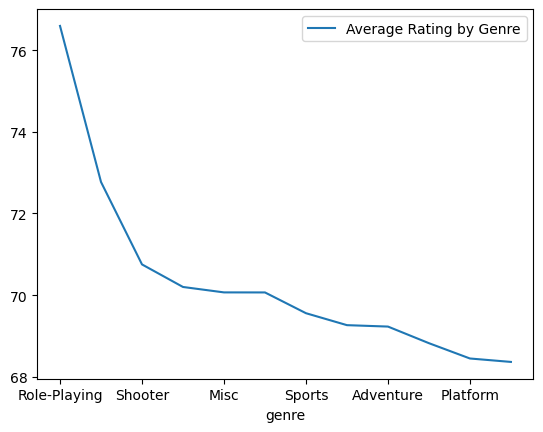

In [13]:
# (#64) Visualize the data by genre vs ratings
genre_ratings_sorted.plot()

In [17]:
#visualize the data by release date vs sales and ratings

In [11]:
#visualize the data by ratings vs sales